In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [6]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [7]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [8]:
X_train['Age_imputed'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values

array([ 8.  , 36.  , 31.  , 21.  , 21.  , 33.  , 14.  , 50.  ,  4.  ,
       16.  , 43.  , 16.  , 34.  , 28.  , 19.  , 18.  , 19.  , 30.  ,
       19.  , 28.  , 33.  , 50.  , 31.  , 70.5 , 23.  , 42.  , 45.  ,
       21.  , 16.  , 59.  , 71.  , 18.  , 34.  , 16.  , 23.  , 24.  ,
       34.  , 19.  , 24.  , 36.  , 18.  , 32.  , 40.  , 19.  , 14.  ,
       34.  ,  4.  ,  7.  , 64.  , 39.  ,  4.  , 32.  , 14.  , 23.  ,
       18.  ,  9.  , 33.  , 35.  , 24.  , 21.  , 35.  , 61.  , 26.  ,
       32.  , 45.  , 29.  , 28.5 , 18.  , 30.  , 40.  , 42.  , 27.  ,
       33.  , 54.  , 25.  , 36.  , 20.  , 30.  , 16.  , 30.  , 58.  ,
       28.  , 18.  , 40.  , 62.  , 27.  ,  7.  , 16.  , 19.  ,  4.  ,
       16.  , 30.  , 22.  , 37.  , 49.  , 31.  , 15.  , 21.  ,  0.75,
       27.  , 47.  , 29.  , 34.  , 23.  , 18.  , 35.  , 58.  ,  8.  ,
       24.  , 24.  , 36.  , 48.  , 29.  ,  2.  , 28.  , 23.  , 24.  ,
       17.  , 41.  ,  3.  , 51.  , 49.  , 43.  , 65.  , 16.  , 29.  ,
       19.  , 17.  ,

In [9]:
X_train['Age_imputed'].isnull().sum()

np.int64(148)

In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age_imputed'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_test['Age_imputed'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

C:\Users\sahad\AppData\Local\Temp\ipykernel_4348\803156696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age_imputed'].dropna().sample(X_train['Age_imputed'].isnull().sum

In [11]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,2.0
493,71.0,49.5042,71.0
527,NaN,221.7792,18.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

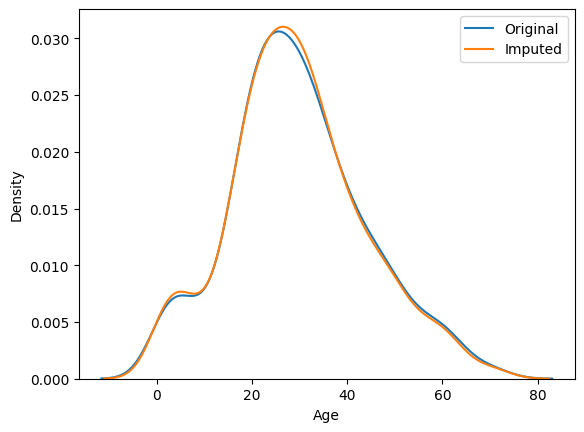

In [16]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [17]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  200.20234599472178


In [18]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.112721
Age,71.512440,204.349513,204.349513
Age_imputed,57.112721,204.349513,200.202346


<Axes: >

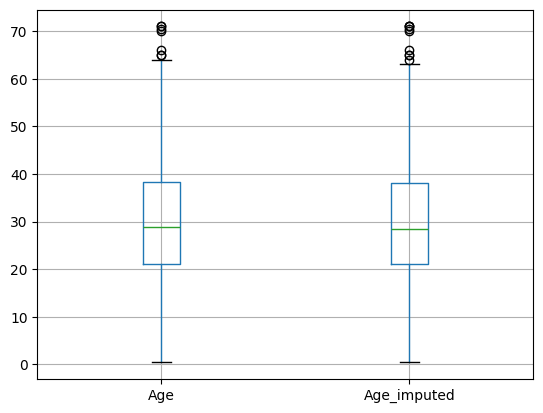

In [19]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))